## Why logistic regression is so important?
One of the legends in the ML community, Andrew NG, once said, "If you know linear regression, logistic regression, advanced optimization tools and regularization, then you may know more ML than many engineers using ML at Silicon Valley." 

Although this might sound disrespectful to the community, it is very accurate for many reasons. First, most algorithms work well if you have lots of data. If you have a lot of data, you should use simplistic models. Logistic regression is perfect choice for that. Second reason is most engineers don't have a high level of understanding of ML concepts. They use existing tools and don't care about what goes on under the hood. Logistic regression is, again, perfect fit.


## Logistic regression pros,cons
Pros: Computationally inexpensive, easy to implement, easy to represent and interpret
Cons: Prone to underfitting, may have low accuracy

## Pseudocode


    Start with the weights all set to 1  
    Repeat R number of times:  
        Calculate the gradient of the entire dataset  
        Update weights vector by alpha*gradient  
        Return the weights vector

In [35]:
def loadDataSet():
    dataMat = []; labelMat = []
    fr = open('data/lrTestSet.txt')
    for line in fr.readlines():
        lineArr = line.strip().split()
        dataMat.append([1.0,float(lineArr[0]),float(lineArr[1])])
        labelMat.append(int(lineArr[2]))
    return dataMat,labelMat

So, let's first understand what the data looks like

Input size (100, 3)
Output size (100, 1)


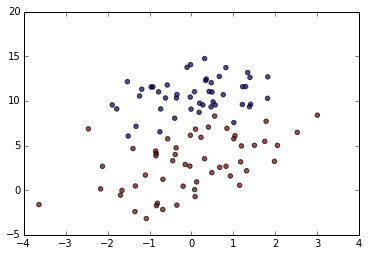

In [143]:
import matplotlib.pyplot as plt
%matplotlib inline

dataMat,labelMat=loadDataSet()
X = mat(dataMatIn)
Y = mat(labelMatIn).transpose()

print "Input size",X.shape
print "Output size",Y.shape

plt.scatter(X[:,1], X[:,2],c=Y.tolist(), alpha=0.7)
plt.show()

In [224]:
def sigmoid(inX):
    return 1.0/(1+exp(-inX))

In [225]:
from numpy import *
from numpy import linalg as LA


def gradAscent(dataMatIn,classLabels,alpha=0.01,maxCycles=500):
    dataMatrix = mat(dataMatIn)
    labelMat = mat(classLabels).transpose()
    
    m,n = shape(dataMatrix)
    weights = ones((n,1))
    errorHistory = []
    for k in range(maxCycles):
        h = sigmoid(dataMatrix*weights)
        error = (labelMat - h)
        errorHistory.append(LA.norm(error))
        weights = weights + alpha* dataMatrix.transpose()*error
       
    
        #Remove this comments to see how line fits at each iteration
        #fig = plt.figure()
        #ax = fig.add_subplot(111)
        #ax.scatter(X[:,1], X[:,2],c=Y.tolist(), alpha=0.7)

        #x = arange(-3.0, 3.0, 0.1)
        #y = (-weights[0]-weights[1]*x)/weights[2]
        #ax.plot(x, y.transpose())
        #plt.show()
    return weights,errorHistory

In this part we are going to run gradient descent. One critical parameters here is the learning rate.

Change the alpha, the learning rate and see how the error rate is changing over time

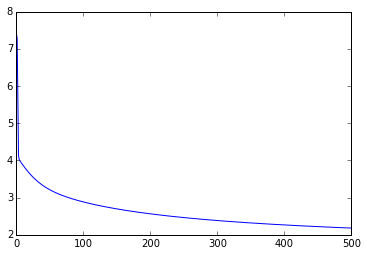

In [226]:
#Read the data and calculate the weights
dataArr,labelMat=loadDataSet()
weights,errorHistory = gradAscent(dataArr,labelMat,alpha=0.001,maxCycles=500)

#Show how error changes over time
fig = plt.figure()
plt.plot(errorHistory)
plt.show()

In this part, we will show the final fit line 

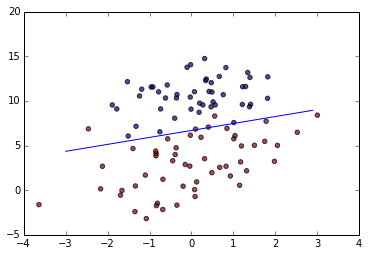

In [227]:
def plotFitLine(weights):
    import matplotlib.pyplot as plt

    fig = plt.figure()
    ax = fig.add_subplot(111)
    ax.scatter(X[:,1], X[:,2],c=Y.tolist(), alpha=0.7)

    x = arange(-3.0, 3.0, 0.1)
    y = (-weights[0]-weights[1]*x)/weights[2]
    ax.plot(x, y.transpose())
    plt.show()

plotFitLine(weights)
    

## Stochastic gradient descent

Gradient descent works perfectly for our data. However, the problem is, gradient descent requires all data to be available. When all the data is available, gradient descent works fairly well, and there are a lot of methods to optimize finding local minima.  

Stochastic gradient descent relaxes this requirement. It enables to read the data one by one and update the weights accordingly.

Pseudocode  

    Start with the weights all set to 1
    For each piece of data in the dataset:
        Calculate the gradient of one piece of data
        Update the weights vector by alpha*gradient
        Return the weights vector

In [248]:
def stocGradAscent0(dataMatrix,classLabels):
    m,n = shape(dataMatrix)
    alpha = 0.001
    weights = ones(n)
    errorHistory = []
    for i in range(m):
        h = sigmoid(sum(dataMatrix[i]*weights))
        error = classLabels[i] - h
        errorHistory.append(LA.norm(error))
        weights = weights + alpha * error * dataMatrix[i]
    return weights,errorHistory

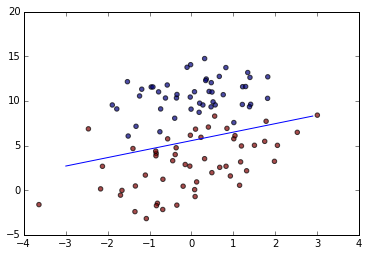

In [249]:
dataArr,labelMat=loadDataSet()
stocWeights,errorHistory=stocGradAscent0(array(dataArr),labelMat)
plotFitLine(stocWeights)

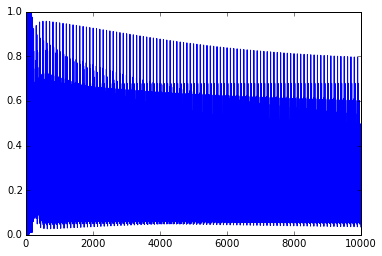

In [250]:
#Show how error changes over time
fig = plt.figure()
plt.plot(errorHistory)
plt.show()

In [252]:
def stocGradAscent1(dataMatrix,classLabels,numIter=150):
    m,n =shape(dataMatrix)
    weights = ones(n)
    errorHistory = []
    for j in range(numIter):
        for i in range(m):
            alpha = 4/(1.0+j+i)+0.01
            randIndex = int(random.uniform(0,len(dataIndex)))
            h =  sigmoid(sum(dataMatrix[randIndex]*weights))
            error = classLabels[randIndex] - h
            errorHistory.append(LA.norm(error))
            weights = weights + alpha * error * dataMatrix[randIndex]
            del(dataIndex[randIndex])
    return weights

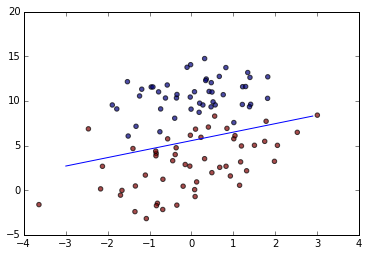

In [253]:
dataArr,labelMat=loadDataSet()
stocWeights,errorHistory=stocGradAscent0(array(dataArr),labelMat)
plotFitLine(stocWeights)

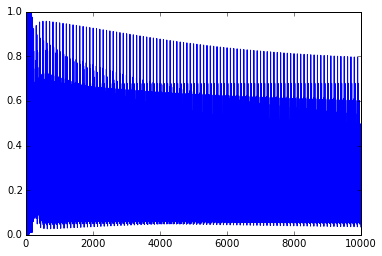

In [254]:
#Show how error changes over time
fig = plt.figure()
plt.plot(errorHistory)
plt.show()